current range: -7e-08, -1.500815660685155e-06
Injection integral (min and max): 1.0000000000000084e-16, -1.7159787928221857e-13
photon energy @ 9 keV: -0.2531557775003489, 434.40994547100695
Peaking time: 405 ns
Config bits: 0101011
Channel to be tested: shap


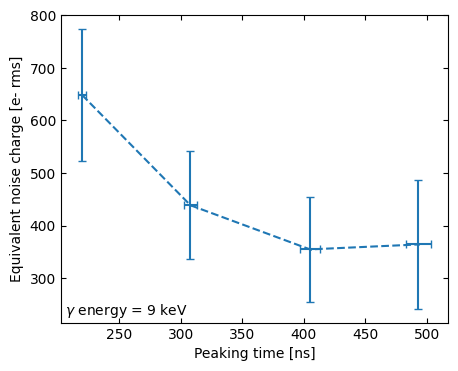

In [3]:
# CSA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from datetime import datetime
import matplotlib.colors as mcolors

import config
config.config(channel='shap',n_steps=20,cfg_bits=[0,1,0,1,0,1,1],cfg_inst=False)

colours = list(mcolors.TABLEAU_COLORS.keys())
# path = [
#     "G:/My Drive/PHD/FALCON/measures/enc/enc_0100011_160424_181001.tsv", # 9 keV, 220 ns
#     "G:/My Drive/PHD/FALCON/measures/enc/enc_0100111_160424_181122.tsv", # 9 keV, 308 ns
#     "G:/My Drive/PHD/FALCON/measures/enc/enc_0101011_160424_181440.tsv", # 9 keV, 405 ns
#     "G:/My Drive/PHD/FALCON/measures/enc/enc_0101111_160424_181604.tsv"  # 9 keV, 493 ns
# ]
path = [
    "G:/My Drive/PHD/FALCON/measures/enc/enc_0100011_170424_174133.tsv", # 9 keV, 220 ns
    "G:/My Drive/PHD/FALCON/measures/enc/enc_0100111_170424_174144.tsv", # 9 keV, 308 ns
    "G:/My Drive/PHD/FALCON/measures/enc/enc_0101011_170424_174154.tsv", # 9 keV, 405 ns
    "G:/My Drive/PHD/FALCON/measures/enc/enc_0101111_170424_174114.tsv"  # 9 keV, 493 ns
]
modes = [
    220,
    308,
    405,
    493
]
dfs = []
for i in range(4):
    dfs.append(pd.read_csv(path[i],sep='\t'))
datetime_str = datetime.strftime(datetime.now(), '%d%m%y_%H%M%S')

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(5)
data = []
data_std = []
for i in range(4):
    data.append(dfs[i]['ENC rms (e-)'][0])
    data_std.append(dfs[i]['ENC std std (e-).1'][0])

ax.plot(
	modes,
	data,
    '--',color=colours[0])
ax.errorbar(
	modes,
	data,
	xerr=[3, 5, 8, 10],
	yerr=data_std,
	fmt='s', markersize=1, capsize=3,
    color=colours[0])
ax.set_xlabel('Peaking time [ns]')
ax.set_ylabel(f'Equivalent noise charge [e- rms]')
ax.tick_params(right=True, top=True, direction='in')
if config.channel_name == 'shap':
	ax.text(.01,.01,f'$\\gamma$ energy = {config.photon_energy} keV',ha='left',va='bottom',transform=ax.transAxes)
plt.savefig(f'G:/My Drive/PHD/FALCON/measures/enc/summary/enc_summary_nominal_{datetime_str}_rms.pdf',dpi=300)